In [49]:
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import torch

In [107]:
path_imagination = '/home/tt2684/Research/Results/FFA_Symbio2023/imagination/'
figsave_imagination = '/home/tt2684/Research/Results/FFA_Symbio2023/Figures/Fig5_Imagery/'

In [12]:
#     dict_imagine = {'kwargs':kwargs_imagination, 'sample':sample, 'interms':interm_Ys,
#                    'percived_class':perceived_class, 'confidence_in_perceived_class':conf}

target_class =3
initial_digit = 7


In [24]:
os.listdir(path_imagination)

['dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep9.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep7.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep0.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_50.0_rep8.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_50.0_rep1.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_50.0_rep6.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_20.0_rep4.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_99.0_rep3.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_99.0_rep4.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_20.0_rep3.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep1.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep6.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_100_rep8.npy',
 'dict_sample_imagine_Target3_Initial7_noiseBetaPercent_20.0_rep2.npy'

In [13]:
dict_imagine.keys()

dict_keys(['kwargs', 'sample', 'interms', 'percived_class', 'confidence_in_perceived_class'])

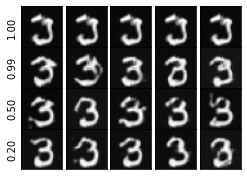

In [108]:
target_class =3
initial_digit = 7

reps = [1,3,4,5,6]

fig, axes = plt.subplots(4,5, figsize=[4,3])

for ibeta, beta_percent in enumerate([100,99.0,50.0,20.0]):
    for irep, rep in enumerate(reps):

        dict_imagine = np.load(path_imagination+
                f'dict_sample_imagine_Target{target_class}_Initial{initial_digit}_noiseBetaPercent_{beta_percent}_rep{rep}.npy',
                allow_pickle=True).item()

        axes[ibeta,irep].imshow(dict_imagine['sample'][0].detach().cpu().numpy(), cmap='gray')
        axes[ibeta,irep].set_xticks([])
        axes[ibeta,irep].set_yticks([])
    axes[ibeta,0].set_ylabel('%0.2f'%(beta_percent/100))
    plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(figsave_imagination+ f'sample_imagined_Imagine{target_class}_initial{initial_digit}_varing_noise.pdf', dpi=300)
fig.savefig(figsave_imagination+ f'sample_imagined_Imagine{target_class}_initial{initial_digit}_varing_noise.png', dpi=300)

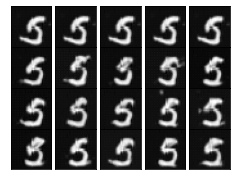

In [309]:
target_class =5
initial_digit = None

reps = [5,8,1,3,4,]

fig, axes = plt.subplots(4,5, figsize=[4,3])

for ibeta, beta in enumerate([1.0,0.8,0.4,0.2]):
    for irep, rep in enumerate(reps):

        dict_imagine = np.load(path_imagination+
                f'dict_sample_imagine_Target{target_class}_Initial{initial_digit}_noise_{beta}_rep{rep}.npy',
                allow_pickle=True).item()

        axes[ibeta,irep].imshow(dict_imagine['sample'][0].detach().cpu().numpy(), cmap='gray')
        axes[ibeta,irep].set_xticks([])
        axes[ibeta,irep].set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(figsave_imagination+ f'sample_Imagine{target_class}_initial{initial_digit}_varing_noise.pdf', dpi=300)
fig.savefig(figsave_imagination+ f'sample_Imagine{target_class}_initial{initial_digit}_varing_noise.png', dpi=300)

In [54]:
len(intermed_Ys)

41

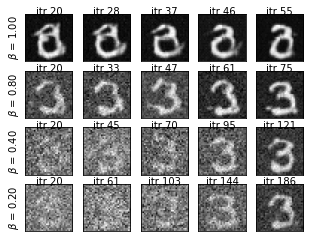

In [319]:
target_class = 3 #9
initial_digit = None #6
num_Ys = 5
cleaner_fig = False
rep = 2#0

fig, axes = plt.subplots(4,num_Ys,figsize=[5,4])

for ibeta, beta in enumerate([1.0,0.8,0.4,0.2]):

    dict_imagine = np.load(path_imagination+
            f'dict_sample_imagine_Target{target_class}_Initial{initial_digit}_noise_{beta}_rep{rep}.npy',
            allow_pickle=True).item()

    sample = dict_imagine['sample']
    intermed_Ys = dict_imagine['interms']
    intermed_denoised = dict_imagine['interims_denoise']

    
    inds = [int(ind) for ind in np.linspace(20, len(intermed_denoised)-1,num_Ys)]

    for i in range(num_Ys):
        axes[ibeta,i].imshow(intermed_denoised[inds[i]][0].detach().cpu().numpy(), cmap='gray')
        axes[ibeta,i].set_xticks([])
        axes[ibeta,i].set_yticks([])
        if not cleaner_fig:
            axes[ibeta,i].set_title('itr %d'%int(inds[i]), y=0.85, fontsize=10)
    if not cleaner_fig:

        axes[ibeta,0].set_ylabel(r'$\beta$ = '+'%0.2f'%(beta))
    
#     plt.subplots_adjust(wspace=0.6, hspace=0.04)
    
fig.savefig(figsave_imagination+ f'interim_denoised_Imagine{target_class}_initial{initial_digit}_varing_noise_rep{rep}_clearfig{cleaner_fig}.pdf', dpi=300)
fig.savefig(figsave_imagination+ f'interim_denoised_Imagine{target_class}_initial{initial_digit}_varing_noise_rep{rep}_clearfig{cleaner_fig}.png', dpi=300)

In [295]:
inds 

[1, 46, 92, 137, 183]

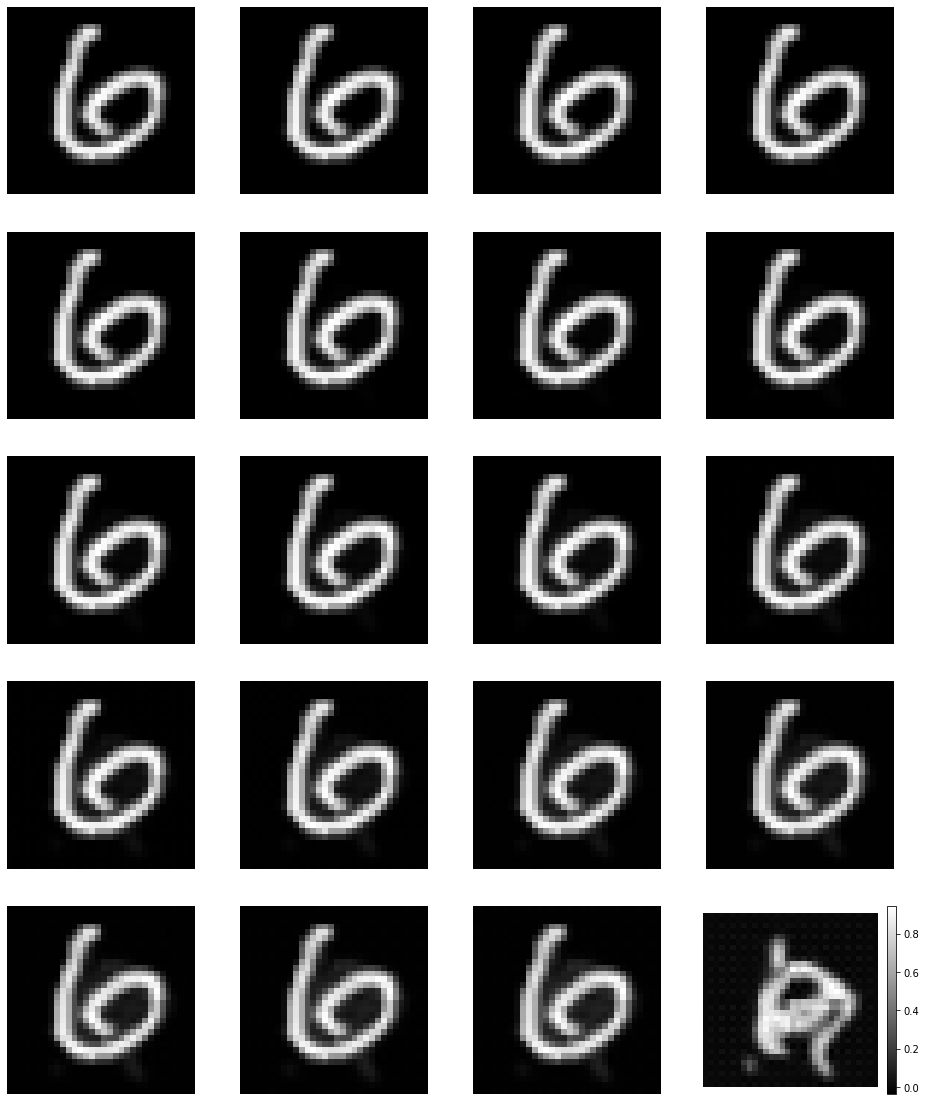

In [111]:
target_class =9
initial_digit = 6

rep = 0
beta_percent = 100

dict_imagine = np.load(path_imagination+
            f'dict_sample_imagine_Target{target_class}_Initial{initial_digit}_noiseBetaPercent_{beta_percent}_rep{rep}.npy',
            allow_pickle=True).item()

sample = dict_imagine['sample']
intermed_Ys = dict_imagine['interms']

sample = dict_imagine['sample']
intermed_Ys = dict_imagine['interms']

plot_all_samples(sample, intermed_Ys)

## plot hallucninations

In [163]:
path_hallucination = '/home/tt2684/Research/Results/FFA_Symbio2023/hallucination/'
figsave_hallucination = '/home/tt2684/Research/Results/FFA_Symbio2023/Figures/Fig4_Hallucination/'

In [180]:
os.listdir(path_hallucination)

['dict_sample_halluc_nothinglike2.npy',
 'dict_sample_halluc_nothinglike_beta0.5.npy',
 'dict_sample_halluc_zerolike.npy',
 'dict_sample_halluc_zerolike_beta%0.2f.npy',
 'dict_sample_halluc_threelike_beta0.5.npy',
 'dict_sample_halluc_nothinglike2_beta0.5.npy',
 'dict_sample_halluc_ninelike_beta0.5.npy',
 'dict_sample_halluc_ninelike_beta0.99.npy',
 'dict_sample_halluc_zerolike3.npy',
 'dict_sample_halluc_nothinglike4_beta0.99.npy',
 'dict_sample_halluc_nothinglike.npy',
 'dict_sample_halluc_zerolike_beta0.5.npy',
 'dict_sample_halluc_nothinglik2e.npy',
 'dict_sample_halluc_nothinglike2_beta0.99.npy',
 'dict_sample_halluc_nothinglike3_beta0.99.npy',
 'dict_sample_halluc_eightlike_beta0.5.npy',
 'dict_sample_halluc_nothinglike1_beta0.99.npy',
 'dict_sample_halluc_nothinglike1_beta0.5.npy',
 'dict_sample_halluc_eightlike.npy',
 'dict_sample_halluc_nothinglike_beta0.99.npy',
 'dict_sample_halluc_sixlike_beta0.5.npy',
 'dict_sample_halluc_sixlike2.npy']

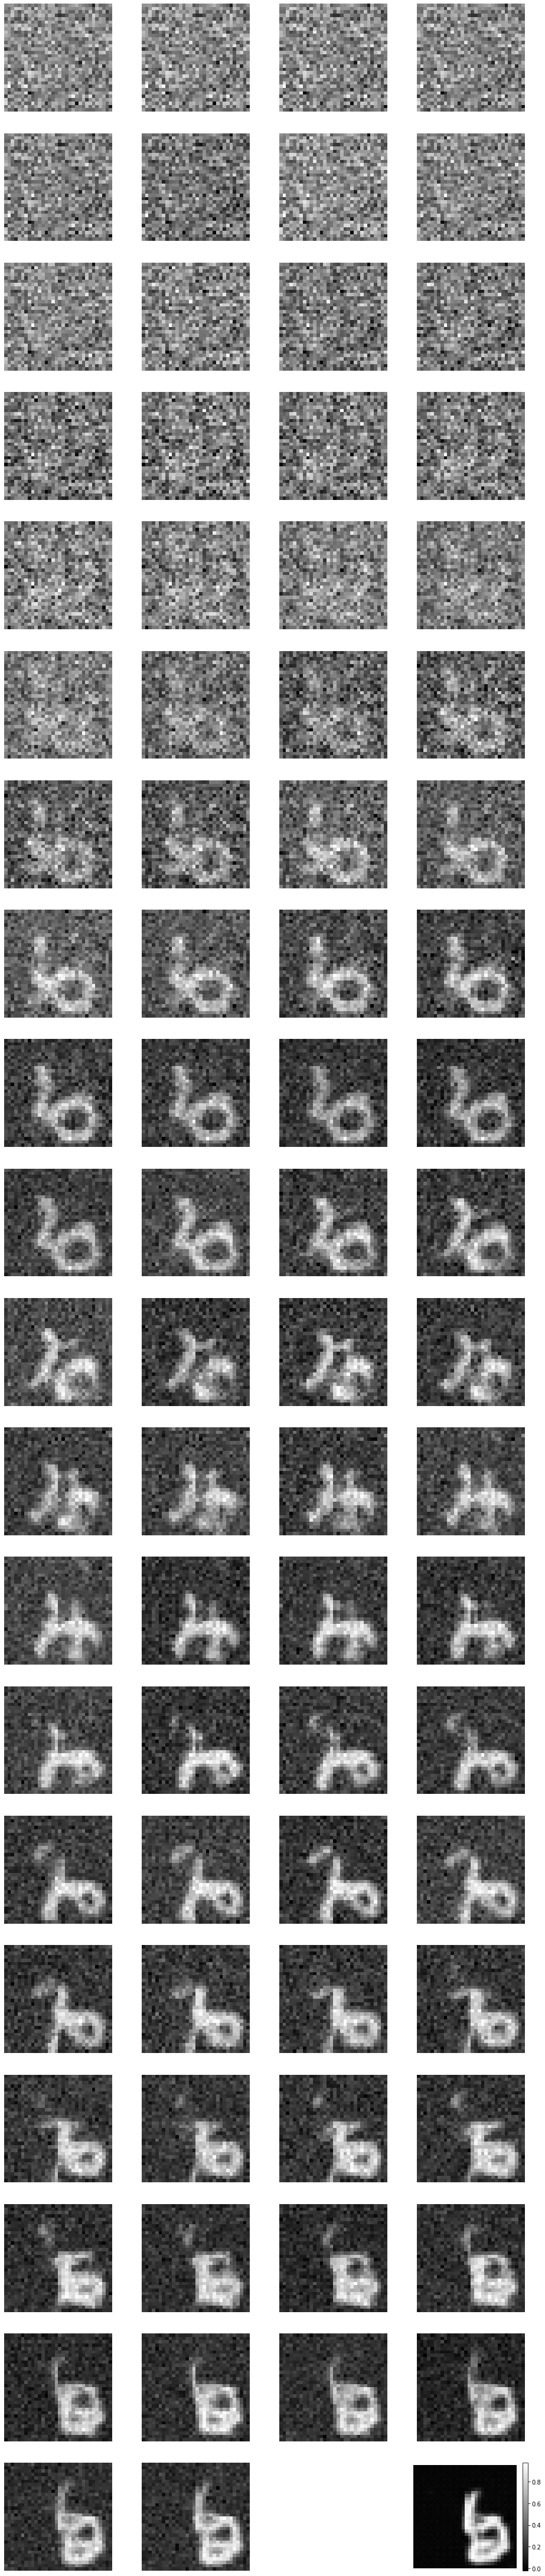

In [141]:


digit_like = 'nine'
beta = 0.5

dict_halluc = np.load(path_hallucination+
            f'dict_sample_halluc_{digit_like}like_beta{beta}.npy',
            allow_pickle=True).item()

sample = dict_halluc['sample']
intermed_Ys = dict_halluc['interms']

sample = dict_halluc['sample']
intermed_Ys = dict_halluc['interms']

plot_all_samples(sample, intermed_Ys)

In [135]:
def get_Ys_halluc(digit_like, beta):
    dict_halluc = np.load(path_hallucination+
            f'dict_sample_halluc_{digit_like}like_beta{beta}.npy',
            allow_pickle=True).item()

    sample = dict_halluc['sample']
    intermed_Ys = dict_halluc['interms']
    print(f'dict_sample_halluc_{digit_like}like_beta{beta}.npy')
    return sample, intermed_Ys

dict_sample_halluc_eightlike_beta0.5.npy
dict_sample_halluc_sixlike_beta0.5.npy
dict_sample_halluc_zerolike_beta0.5.npy


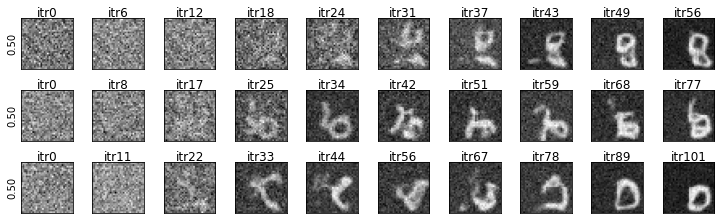

In [320]:
cleaner_fig = False
beta = 0.5
num_Ys = 10
fig, axes = plt.subplots(3,num_Ys,figsize=[10,3],constrained_layout =True)
itr_text_position = 0.9


digit_like = 'eight'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 0

inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))


digit_like = 'six'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 1
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))

del sample, intermed_Ys

digit_like = 'zero'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 2
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))

if cleaner_fig:
    if beta < 0.8:
        axes[1,0].set_ylabel('High Noise', rotation = 90, fontsize=16)
    else:
        axes[1,0].set_ylabel('Low Noise', rotation = 90, fontsize=16)


# plt.tight_layout()
# plt.subplots_adjust(wspace=0.02, hspace=0.04)

fig.savefig(figsave_hallucination+ f'interim_halluc_good_beta{beta}_cleanfig{cleaner_fig}.pdf', dpi=300)
fig.savefig(figsave_hallucination+ f'interim_halluc_good_beta{beta}_cleanfig{cleaner_fig}.png', dpi=300)

dict_sample_halluc_nothing1like_beta0.99.npy
dict_sample_halluc_nothing2like_beta0.99.npy
dict_sample_halluc_nothing3like_beta0.99.npy


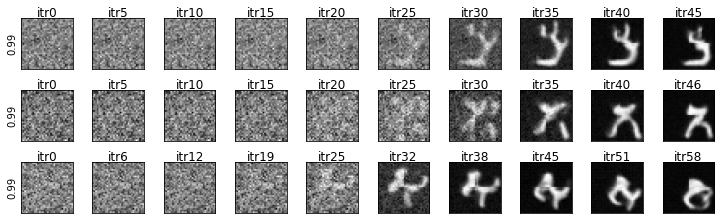

In [182]:
cleaner_fig = False
beta = 0.99
num_Ys = 10
fig, axes = plt.subplots(3,num_Ys,figsize=[10,3],constrained_layout =True)
itr_text_position = 0.9


digit_like = 'nothing1'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 0

inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))


digit_like = 'nothing2'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 1
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))

del sample, intermed_Ys

digit_like = 'nothing3'
sample, intermed_Ys = get_Ys_halluc(digit_like, beta)
ibeta = 2
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

for i in range(num_Ys):
    axes[ibeta,i].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i].set_xticks([])
    axes[ibeta,i].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))

if cleaner_fig:
    if beta < 0.8:
        axes[1,0].set_ylabel('High Noise', rotation = 90, fontsize=16)
    else:
        axes[1,0].set_ylabel('Low Noise', rotation = 90, fontsize=16)


# plt.tight_layout()
# plt.subplots_adjust(wspace=0.02, hspace=0.04)

fig.savefig(figsave_hallucination+ f'interim_halluc_good_beta{beta}_cleanfig{cleaner_fig}.pdf', dpi=300)
fig.savefig(figsave_hallucination+ f'interim_halluc_good_beta{beta}_cleanfig{cleaner_fig}.png', dpi=300)

## Occlusions

In [183]:
path_occlusions = '/home/tt2684/Research/Results/FFA_Symbio2023/occlusions/'

figsave_occlusions = '/home/tt2684/Research/Results/FFA_Symbio2023/Figures/Fig4_Occlusion/'


In [198]:
def get_Ys_denoiseds_occlud(occluded_digit, beta):
    dict_occlud = np.load(path_occlusions+
            f'dict_occlud_{occluded_digit}_{beta}.npy',
            allow_pickle=True).item()

    sample = dict_occlud['sample']
    intermed_Ys = dict_occlud['interms']
    intermed_denoised = dict_occlud['interims_denoise']
    original_input = dict_occlud['kwargs']['original_input']
    occluded_input = dict_occlud['kwargs']['occluded_input']

    print(f'dict_occlud_{occluded_digit}_{beta}.npy')
    return original_input,occluded_input, intermed_Ys, intermed_denoised

dict_occlud_5_0.2.npy
dict_occlud_8_0.2.npy
dict_occlud_9_0.2.npy


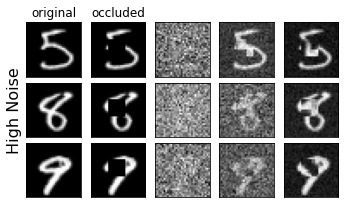

In [239]:
cleaner_fig = True
beta = 0.2 #0.5 #1.00
num_Ys = 3
fig, axes = plt.subplots(3,num_Ys+2,figsize=[5,3]) #,constrained_layout =True
itr_text_position = 0.9


occluded_digit = 5
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta)
ibeta = 0

inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))


occluded_digit = 8
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta)
ibeta = 1
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')




for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))



occluded_digit = 9
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta)
ibeta = 2
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta))


if cleaner_fig:
    if beta < 0.8:
        axes[1,0].set_ylabel('High Noise', rotation = 90, fontsize=16)
    else:
        axes[1,0].set_ylabel('Low Noise', rotation = 90, fontsize=16)
        
for ibeta in range(3):
    for i in range(2):
        axes[ibeta,i].set_xticks([])
        axes[ibeta,i].set_yticks([])
axes[0,0].set_title('original')
axes[0,1].set_title('occluded')
plt.tight_layout()
plt.subplots_adjust(wspace=0.04, hspace=0.1)

fig.savefig(figsave_occlusions+ f'interim_occlu_3digits_beta{beta}_numshownInterm{num_Ys}_cleanfig{cleaner_fig}.pdf', dpi=300)
fig.savefig(figsave_occlusions+ f'interim_occlu_3digits_beta{beta}_numshownInterm{num_Ys}_cleanfig{cleaner_fig}.png', dpi=300)

dict_occlud_5_0.5.npy
dict_occlud_8_0.5.npy
dict_occlud_9_0.5.npy
dict_occlud_5_0.2.npy
dict_occlud_8_0.2.npy
dict_occlud_9_0.2.npy


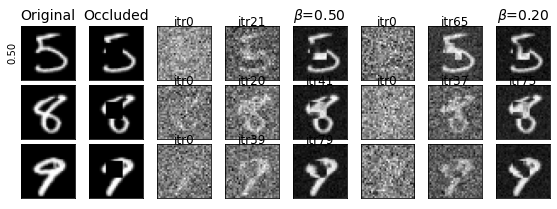

In [249]:
cleaner_fig = False
beta_low = 0.2 #0.5 #1.00
beta_high=0.5
num_Ys = 3
fig, axes = plt.subplots(3,2*num_Ys+2,figsize=[8,3]) #,constrained_layout =True
itr_text_position = 0.9


occluded_digit = 5
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_high)
ibeta = 0

inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)
if not cleaner_fig:
    
    axes[ibeta,0].set_ylabel('%0.2f'%(beta_high))


occluded_digit = 8
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_high)
ibeta = 1
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')




for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)




occluded_digit = 9
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_high)
ibeta = 2
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2].set_xticks([])
    axes[ibeta,i+2].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)


    
    
#----beta low    

occluded_digit = 5
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_low)
ibeta = 0

inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2+num_Ys].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2+num_Ys].set_xticks([])
    axes[ibeta,i+2+num_Ys].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2+num_Ys].set_title('itr%d'%int(inds[i]), y=itr_text_position)



occluded_digit = 8
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_low)
ibeta = 1
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')




for i in range(num_Ys):
    axes[ibeta,i+2+num_Ys].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2+num_Ys].set_xticks([])
    axes[ibeta,i+2+num_Ys].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2+num_Ys].set_title('itr%d'%int(inds[i]), y=itr_text_position)




occluded_digit = 9
original_input,occluded_input, intermed_Ys, intermed_denoised = get_Ys_denoiseds_occlud(occluded_digit, beta_low)
ibeta = 2
inds = [int(ind) for ind in np.linspace(0, len(intermed_Ys)-1,num_Ys)]

axes[ibeta,0].imshow(original_input[0].detach().cpu().numpy(), cmap='gray')
axes[ibeta,1].imshow(occluded_input[0].detach().cpu().numpy(), cmap='gray')

for i in range(num_Ys):
    axes[ibeta,i+2+num_Ys].imshow(intermed_Ys[inds[i]][0].detach().cpu().numpy(), cmap='gray')
    axes[ibeta,i+2+num_Ys].set_xticks([])
    axes[ibeta,i+2+num_Ys].set_yticks([])
    if not cleaner_fig:
        axes[ibeta,i+2].set_title('itr%d'%int(inds[i]), y=itr_text_position)


    

    

if cleaner_fig:
    
        axes[0,4].set_title('High Noise',  fontsize=14)
   
        axes[0,7].set_title('Low Noise', fontsize=14)
else:
        axes[0,4].set_title(r'$\beta$=%0.2f'%(beta_high),  fontsize=14)
   
        axes[0,7].set_title(r'$\beta$=%0.2f'%(beta_low), fontsize=14)

        
for ibeta in range(3):
    for i in range(2):
        axes[ibeta,i].set_xticks([])
        axes[ibeta,i].set_yticks([])
axes[0,0].set_title('Original',  fontsize=14)
axes[0,1].set_title('Occluded',  fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0.04, hspace=0.1)

fig.savefig(figsave_occlusions+ f'interim_occlu_3digits_betahigh{beta_high}_betallow{beta_low}_numshownInterm{num_Ys}_cleanfig{cleaner_fig}.pdf', dpi=300)
fig.savefig(figsave_occlusions+ f'interim_occlu_3digits_betahigh{beta_high}_betalow{beta_low}_numshownInterm{num_Ys}_cleanfig{cleaner_fig}.png', dpi=300)

In [47]:

def plot_all_samples(sample, intermed_Ys):
    n_rows = int(np.ceil(len(intermed_Ys)/4))

    f, axs = plt.subplots(n_rows,4, figsize = ( 4*4, n_rows*4))
    axs = axs.ravel()

    #### plot intermediate steps
    for ax in range(len(intermed_Ys)):
        if torch.cuda.is_available():
            intermed_Ys[ax] = intermed_Ys[ax].cpu()
            
        x = intermed_Ys[ax].detach().permute(1,2,0).numpy()
        if x.shape[2] == 1:
            fig = axs[ax].imshow(x.squeeze(-1), 'gray')
        else:
            fig = axs[ax].imshow(rescale_image(x))
        axs[ax].axis('off')
    
    #### plot final sample
    if torch.cuda.is_available():
        sample =sample.cpu()
        
    sample = sample.detach().permute(1,2,0).numpy()
    if sample.shape[2] == 1:
        fig = axs[-1].imshow(sample.squeeze(-1),'gray' )
    else:
        fig = axs[-1].imshow(rescale_image(sample))
    axs[-1].axis('off')
    plt.colorbar(fig, ax=axs[-1], fraction=.05)


    for ax in range(len(intermed_Ys),n_rows*4 ):
        axs[ax].axis('off')